minibatch size 란?

학습데이터가 총 10개라는 가정하에

학습에 필요한 데이터를 몇개씩 묶어서 할 건지

테스트 데이터가 2개면 남은 8개를 한번에 돌리는 것이 아니라

2개씩 쪼개서 4개를 이용하는 것을

미니베치 1 2 3 4 라고 부르고 사용할 수 있음



================================

미니배치는 쪼갠거고 쪼개기 전의 전체 덩어리를 배치라고 함

한사이클 다 돌면 1에폭

두사이클 돌면 2에폭 이런식으로

구현해볼 예정 (미니배치들이 다 돌아갈때 에폭이 1씩 올라가도록

#ppt 사진

미니베치가 4개 넣어준거임
미니베치 사이즈가 4개 지만 한꺼번에 수행하겠다

디폴트는 10에서 1000사이


학습데이터가 전부다 돌아갔을 때 에폭이 1번 돌아가는 거고 에폭은 30번 돌릴것임




ppt에 나와있는 4가지 값이 있는 x,y,y_hat값을

systeam structure의 그림처럼 만들어 줄 것임

In [70]:
import numpy as np

x = np.asarray([580,700, 810, 840])
y_lable_total = np.asarray([374, 385, 375, 401])

input_count  = 1
output_count = 1
RND_MEAN = 0
RND_STD = 1                           #표준푠처

def main_execute(x, y, epoch_count, report, lr = 0.001):       #learning rate = lr
    model_init()
    theta_0, theta_1, sse_row = run_train(x, y, epoch_count, report, lr)

    return theta_0, theta_1, sse_row

In [71]:
def model_init():
    global theta_0, theta_1
    theta_1 = np.random.normal(RND_MEAN, RND_STD, [input_cnt, output_cnt])
    theta_0 = np.random.normal(RND_MEAN, RND_STD, [output_cnt])

    #왜 ,theta_0이랑 theta_1이 모델이닛에 들어가는 거인가?
    #수학 내용 사진들을 코드화를 시켜주는 거같은데 노 감

In [72]:
def forward_neuralnet(input_x):
    y_hat = theta_0 + theta_1 * input_x

    return y_hat

In [73]:
def forward_postproc(output, y):
  #sse를 쓰려면 예측값과 실제값이 필요할 것임
  diff = output - y
  square = np.square(diff)
  sse = 1/2 * (np.sum(square))

  return sse

In [82]:
def back_propagation(y_hat,lr):
  #전역변수화
  global theta_0, theta_1
  theta_0 = theta_0 - lr * (np.sum(y_hat - y_label_total))
  theta_1 = theta_1 - lr * (np.sum((y_hat - y_label_total)*x))

In [93]:
def run_train(x, y, epoch_count, report, lr):
  print('initial theta_0 : {}'.format(theta_0))
  print('initial theta_1 : {}'.format(theta_1))
  sse_row = []
  theta_0_row = []
  theta_1_row = []

  for epoch in range(epoch_count):
    y_hat = forward_neuralnet(x)
    sse = forward_postproc(y_hat, y_label_total)

    sse_row.append(sse)

    back_propagation(y_hat, lr)
 
    theta_0_row.append(theta_0)
    theta_1_row.append(theta_1)

    if report > 0 and (epoch) % report == 0:
      #리포트가 0보다 크고 에폭값이 나눴을 때 나머지가 0과같을 때
      print('Epoch = {}'.format(epoch + 1))
      print("Sse = {}".format(sse))



  print('=================================================')
  print('Final SSE : {}'.format(sse))

  return theta_0_row, theta_1_row, sse_row

theta_0, theta_1, sse_row = main_execute(x, y_label_total, epoch_count = 30, report = 4, lr=0.1)

initial theta_0 : [-0.79406067]
initial theta_1 : [[-1.00409612]]
Epoch = 1
Sse = 2532977.2279207115
Epoch = 5
Sse = 1.328554257707093e+49
Epoch = 9
Sse = 6.980828617322688e+91
Epoch = 13
Sse = 3.668045012217733e+134
Epoch = 17
Sse = 1.9273577606916724e+177
Epoch = 21
Sse = 1.0127214702451186e+220
Epoch = 25
Sse = 5.3212994349703665e+262
Epoch = 29
Sse = 2.796052864344062e+305
Final SSE : inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


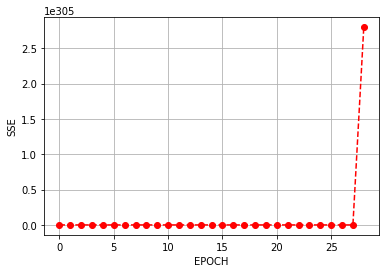

In [94]:
import matplotlib.pyplot as plt

plt.plot(sse_row, '--o', color = 'red')
plt.xlabel("EPOCH")
plt.ylabel('SSE')
plt.grid()
plt.show()

In [89]:
epoch = 10
report = 3
for i in range(epoch):
  result = i % report
  print(result)

0
1
2
0
1
2
0
1
2
0


In [90]:
x = np.asarray([580,700, 810, 840])
y_lable_total = np.asarray([374, 385, 375, 401])


theta_0, theta_1, sse_row=main_execute(x, y_label_total, epoch_count = 6, report = 2, lr = 0.001)

initial theta_0 : [0.05880206]
initial theta_1 : [[-1.44897224]]
Epoch = 1
Sse = 4224410.256648011
Epoch = 3
Sse = 9.655587752998473e+19
Epoch = 5
Sse = 2.209308654792073e+33
Final SSE : 1.0568059097087729e+40


In [66]:
#합쳐보고 에러 찾아봄############========================

import numpy as np

x = np.asarray([580,700, 810, 840])
y_lable_total = np.asarray([374, 385, 375, 401])

input_count  = 1
output_count = 1
RND_MEAN = 0
RND_STD = 1                           #표준푠처

def main_execute(x, y, epoch_count, report, lr = 0.001):       #learning rate = lr
    model_init()
    theta_0, theta_1, sse_row = run_train(x, y, epoch_count, report, lr)

    return theta_0, theta_1, sse_row


def model_init():
    global theta_0, theta_1
    theta_1 = np.random.normal(RND_MEAN, RND_STD, [input_cnt, output_cnt])
    theta_0 = np.random.normal(RND_MEAN, RND_STD, [output_cnt])

    #왜 ,theta_0이랑 theta_1이 모델이닛에 들어가는 거인가?
    #수학 내용 사진들을 코드화를 시켜주는 거같은데 노 감

def forward_neuralnet(input_x):
    y_hat = theta_0 + theta_1 * input_x

    return y_hat


def forward_postproc(output, y):
  #sse를 쓰려면 예측값과 실제값이 필요할 것임
  diff = output - y
  square = np.square(diff)
  sse = 1/2 * (np.sum(square))

  return sse


def back_propagation(y_hat,lr):
  #전역변수화
  global theta_0, theta_1
  theta_0 = theta_0 - lr * (np.sum(y_hat - y_label_total))
  theta_1 = theta_1 - lr * (np.sum(y_hat - y_label_total)*x)


def run_train(x, y, epoch_count, report, lr):
  print('initial theta_0 : {}'.format(theta_0))
  print('initial theta_1 : {}'.format(theta_1))
  sse_row = []
  theta_0_row = []
  theta_1_row = []

  for epoch in range(epoch_count):
    y_hat = forward_neuralnet(x)
    sse = forward_postproc(y_hat, y)

    sse_row.append(sse)

    back_propagation(y_hat, lr)
 
    theta_0_row.append(theta_0)
    theta_1_row.append(theta_1)

    if report > 0 and (epoch) % report == 0:
      #리포트가 0보다 크고 에폭값이 나눴을 때 나머지가 0과같을 때
      print('Epoch = {}'.format(epoch + 1))
      print("Sse = {}".format(sse))



  print('=================================================')
  print('Final SSE : {}'.format(sse))

  return theta_0_row, theta_1_row, sse_row

theta_0, theta_1, sse_row = main_execute(x, y_label_total, epoch_count = 30, report = 4, lr=0.1)

initial theta_0 : [0.26876471]
initial theta_1 : [[0.35551328]]
Epoch = 1
Sse = 32240.672763321625
Epoch = 5
Sse = 1.7042199306810749e+47
Epoch = 9
Sse = 8.954749512850682e+89
Epoch = 13
Sse = 4.705234189219542e+132
Epoch = 17
Sse = 2.472344842659103e+175
Epoch = 21
Sse = 1.2990828458714703e+218
Epoch = 25
Sse = 6.825974319271829e+260
Epoch = 29
Sse = 3.586678521345699e+303
Final SSE : inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in square


In [67]:
theta_0, theta_1, sse_row = main_execute(x, y_label_total, epoch_count = 30, report = 4, lr=0.1)

initial theta_0 : [-0.1353707]
initial theta_1 : [[0.08174355]]
Epoch = 1
Sse = 210123.55613709538
Epoch = 5
Sse = 1.1812697825651378e+48
Epoch = 9
Sse = 6.206930701569145e+90
Epoch = 13
Sse = 3.2614047445133257e+133
Epoch = 17
Sse = 1.7136909398464847e+176
Epoch = 21
Sse = 9.004514518636215e+218
Epoch = 25
Sse = 4.731382995092085e+261
Epoch = 29
Sse = 2.486084618989215e+304
Final SSE : inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in square


In [62]:
#강사님 코드 ###################===================================

import numpy as np

x             = np.asarray([580, 700, 810, 840])
y_label_total = np.asarray([374, 385, 375, 401])

RND_MEAN   = 0
RND_STD    = 1

input_cnt  = 1
output_cnt = 1

def main_execute(x,y,epoch_count, report,lr = 0.001):
    model_init()
    theta_0, theta_1, sse_row = run_train(x,y, epoch_count, report, lr)
    
    return theta_0, theta_1, sse_row

def model_init():
    global theta_0, theta_1
    #theta_0 = np.array(1)
    #theta_1 = np.array(2) 
    theta_0 = np.random.normal(RND_MEAN, RND_STD, [output_cnt])
    theta_1 = np.random.normal(RND_MEAN, RND_STD, [input_cnt, output_cnt])
    

def forward_neuralnet(input_x):
    y_hat = theta_0 + theta_1 * input_x

    return y_hat

def forward_postproc(output, y):
    diff   = output-y
    square = np.square(diff)
    sse    = 1/2*(np.sum(square))

    return sse 

def back_propagation(y_hat, lr):
    global theta_0, theta_1
    theta_0 = theta_0 - lr * (np.sum(y_hat - y_label_total))
    theta_1 = theta_1 - lr * (np.sum((y_hat - y_label_total) * x))


def run_train(x, y, epoch_count, report, lr):
    sse_row = []
    print("Initial theta_0 : {}".format(theta_0))
    print("Initial theta_1 : {}".format(theta_1))

    y_hat = forward_neuralnet(x)
    sse   = forward_postproc(y_hat, y)
    
    theta_0_row = []
    theta_1_row = []
    
    for epoch in range(epoch_count):
        y_hat = forward_neuralnet(x)    
        sse   = forward_postproc(y_hat,y_label_total)
        
        sse_row.append(sse)
        back_propagation(y_hat, lr)
        
        theta_0_row.append(theta_0)
        theta_1_row.append(theta_1)
        
        if report > 0 and (epoch) % report == 0:
            print("Epoch - {}".format(epoch+1))
            print("SSE : {}".format(sse))
    print("==========================")
    print("Final SSE : {}".format(sse))
    return theta_0_row, theta_1_row, sse_row

theta_0, theta_1, sse_row = main_execute(x, y_label_total, epoch_count = 30, report = 4, lr=0.1)

Initial theta_0 : [0.36069619]
Initial theta_1 : [[-0.38166317]]
Epoch - 1
SSE : 883311.6851733028
Epoch - 5
SSE : 4.617606071599447e+48
Epoch - 9
SSE : 2.4263003502602302e+91
Epoch - 13
SSE : 1.2748886107631525e+134
Epoch - 17
SSE : 6.698844888182437e+176
Epoch - 21
SSE : 3.5198779294973804e+219
Epoch - 25
SSE : 1.8495040332131582e+262
Epoch - 29
SSE : 9.718135791601706e+304
Final SSE : inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in square
